In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
#df

Remove white characters from the beginning and end of content and convert to lowercase for consistency 

In [5]:
df['Content'] = df['Content'].str.strip()
df['Content'] = df['Content'].str.lower()

df['Title'] = df['Title'].str.strip()
df['Title'] = df['Title'].str.lower()

Remove special characters from the content

In [6]:
spec_chars = ["!", '"', "#", "%", "&", "'", "(", ")", "*", "+", ",", "-", ".", "/", ":", ";", "<",
              "=", ">", "?", "@", "[", "\\", "]", "^", "_", "`", "{", "|", "}", "~", "–"]

for char in spec_chars:
    df['Content'] = df['Content'].str.replace(char, '')

for char in spec_chars:
    df['Title'] = df['Title'].str.replace(char, '')

In [45]:
df.Label.unique()

array(['Entertainment', 'Technology', 'Business', 'Health'], dtype=object)

Group the content of each label in a large text variable

In [14]:
entertainment_content = ""
technology_content = ""
business_content = ""
health_content = ""
for i in df.index: 
  if df['Label'][i] == "Entertainment":
    entertainment_content += df['Title'][i]+ " " + df['Content'][i]+ " "
  if df['Label'][i] == "Technology":
    technology_content += df['Title'][i]+ " " + df['Content'][i]+ " "
  if df['Label'][i] == "Business":
    business_content += df['Title'][i]+ " " + df['Content'][i]+ " "
  if df['Label'][i] == "Health":
    health_content += df['Title'][i]+ " " + df['Content'][i]+ " "

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words.append("said")
stop_words.append("say")
stop_words.append("says")
stop_words.append("one")
stop_words.append("also")
stop_words.append("may")
stop_words.append("will")
stop_words.append("seem")
stop_words.append("many")
stop_words.append("much")
stop_words.append("think")
stop_words.append("like")
stop_words.append("would")
stop_words.append("even")

stop_words.append("well")
stop_words.append("time")

Word Cloud for "Entertainment" Category

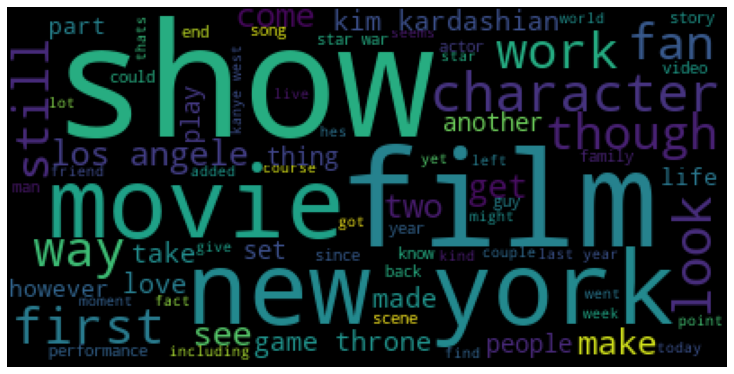

In [23]:
entertainment_wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, min_font_size = 8).generate(entertainment_content)
plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(entertainment_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Word Cloud for "Technology" Category

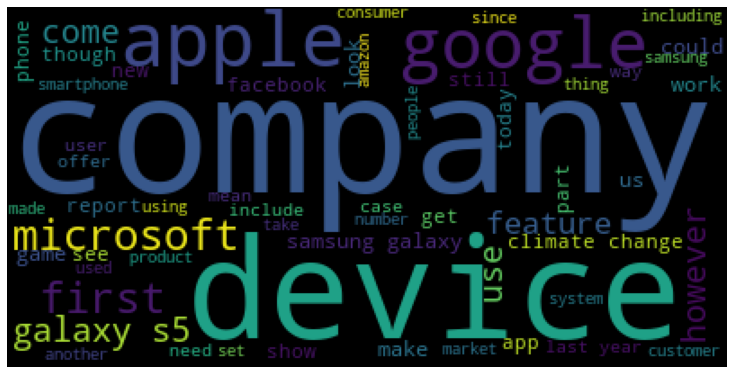

In [24]:
technology_wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, min_font_size = 8).generate(technology_content)
plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(technology_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Word Cloud for "Business" Category

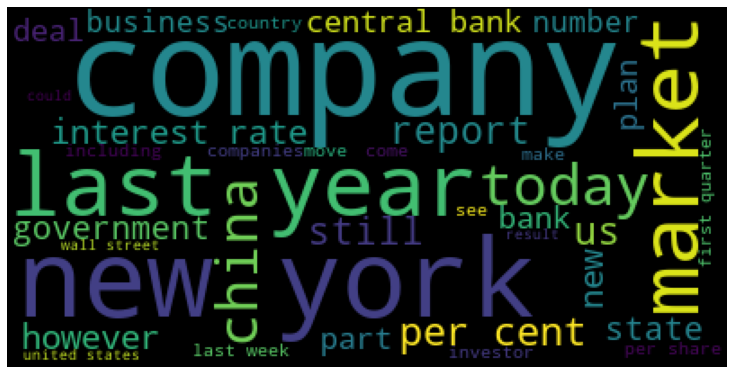

In [25]:
business_wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, min_font_size = 8).generate(business_content)
plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(business_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Word Cloud for "Health" Category

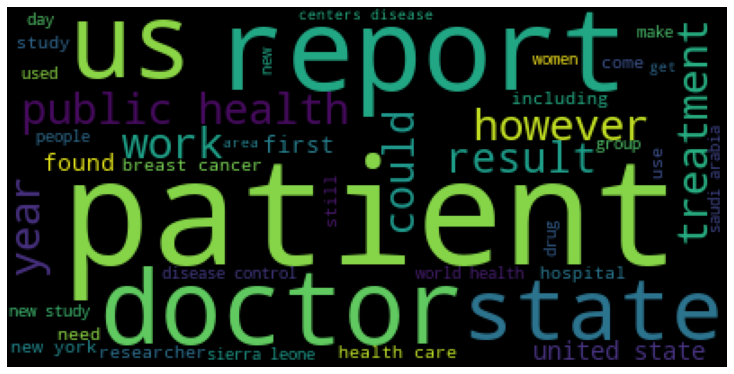

In [26]:
health_wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, min_font_size = 8).generate(health_content)
plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(health_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()